# Exploring the data

# First steps : importing the data and first statistics 

Link for the data and the problem description : https://www.drivendata.org/competitions/7/page/23/

In [11]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import copy as cp

%matplotlib inline


Importing the files :

In [13]:
# @hidden_cell
from io import BytesIO
import requests
import json

# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage V3."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'admin_c24f02ccead8f3d4baea656ecbccd8e6e38d474d','domain': {'id': '8d5c5723b93e4bdf8c5be53de58a2395'},
            'password': 'D!~GY/p7Z]b##1oV'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return BytesIO(resp2.content)

features_train = pd.read_csv(get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f('seminaire_data', 'Training_setX.csv'))
features_train.head()
target_train = pd.read_csv(get_object_storage_file_with_credentials_4ce2b21ebf484e98948d2c0b81b8b84f('seminaire_data', 'Training_setY.csv'))
target_train.head()




,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


#### Concatenating the two dataframes : target and features.

In [14]:
target_train = target_train.drop('id', axis = 1)
features_train = features_train.drop('id', axis = 1)

In [15]:
data_train = pd.concat([features_train,target_train], axis = 1)

#### First statistics about the dataframe :

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object


In [17]:
data_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [18]:
data_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


#### Studying the first variables :

###### Plotting the 10 most represented funders

In [19]:
data_train.funder.value_counts()[:10]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64

__Danida__ : Danish International Development Agency (DANIDA), is the brand used by the Ministry of Foreign Affairs of Denmark when it provides humanitarian aid and development assistance to other countries, with focus on developing countries. There is no distinct Danida organisation within the Ministry.

__Hesawa__ : Health through Sanitation and Water Programme (HESAWA), supported by Swedish International Development Cooperation Agency.

__Rwssp__ : Rural Water Supply and Sanitation Programme, supported by the European commission.

###### Plotting the 10 most represented installers

In [20]:
data_train.installer.value_counts()[:10]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64

__DWE__ : Region of Democratic Republic of the Congo.

__RWE__ : German electric utilities company.

###### Plotting the 20 installers with the highest number of non functional pumps installed

In [21]:
data_train[data_train["status_group"] == "non functional"].installer.value_counts()[:20]

DWE                   6347
Government            1034
RWE                    765
Central government     450
DANIDA                 425
KKKT                   414
TCRS                   375
Hesawa                 348
0                      329
Commu                  304
District council       284
LGA                    225
District Council       223
HESAWA                 201
AMREF                  167
Gover                  161
FW                     160
FinW                   158
Idara ya maji          143
TASAF                  141
Name: installer, dtype: int64

###### Plotting the 20 installers with the highest rate of non functional pumps installed

In [22]:
(data_train[data_train["status_group"] == "non functional"].installer.value_counts() / data_train.installer.value_counts()).sort_values(ascending = False)[:10]

world banks               1
Luleka                    1
MCHOME                    1
MBULU DISTRICT COUNCIL    1
MBIUSA                    1
MASWI DRILLING CO. LTD    1
MARAFIN                   1
MANGO TREE                1
MAKE ENGINEERING          1
MAKAMA CONSTRUCTION       1
Name: installer, dtype: float64

In [23]:
(data_train[data_train["status_group"] == "non functional"].installer.value_counts() / data_train.installer.value_counts()).value_counts()[1]

548

We notice that the installer is an important feature for prediction. Indeed, there are 548 installers who installed only non functional pumps.

# Studying the "date_recorded" feature

Here, we only keep the year from the date (last 4 digits)

In [24]:
data_train['date_recorded'] = data_train['date_recorded'].apply(lambda x: int(x[:4]))

In [25]:
data_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000,2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25,2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0,2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0,2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Crosstable for better visualization.

In [26]:
pd.crosstab(data_train.date_recorded, data_train.status_group)

status_group,functional,functional needs repair,non functional
date_recorded,,,
2002,1,0,0
2004,10,1,19
2011,16220,1812,10642
2012,3126,362,2936
2013,12902,2142,9227


In [27]:
pd.crosstab(data_train.date_recorded, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
date_recorded,,,
2002,1.000000,0.000000,0.000000
2004,0.333333,0.033333,0.633333
2011,0.565669,0.063193,0.371138
2012,0.486613,0.056351,0.457036
2013,0.531581,0.088253,0.380166


The date is not directy corellated with the fact that the pump is functional or not. Indeed, it is the recorded date and does not affect the functional aspect of the pumps. Therefore, we could drop this feature.

# Studying the installer

Here, we create a histogram disclosing the number of installers according to the rate of non functional pumps installed.

In [38]:
Count_installer =(data_train[data_train["status_group"] == "non functional"].installer.value_counts() / data_train.installer.value_counts()).value_counts()

In [39]:
Count_installer = np.array([Count_installer.index,Count_installer.iloc[:]])

In [40]:
values = list(Count_installer[0])
dim = len(values)
frequencies = list(Count_installer[1])
values_count = []

for i in range(dim):
    values_count += [values[i]] * frequencies[i]

/usr/local/src/bluemix_jupyter_bundle.v34/notebook/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


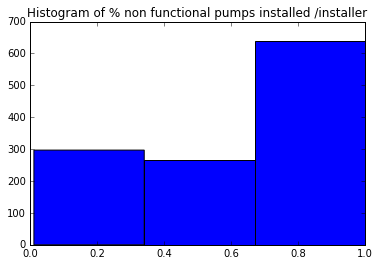

In [41]:
plt.figure()
plt.hist(values_count, bins = 3)
plt.title("Histogram of % non functional pumps installed /installer")
plt.show()

We could for example use the following categories for installers. This will decrease the complexity of the data and could lead to better results.

# Studying the amount_tsh

If you imagine that you can disconnect the pump and if you can discharge it vertically, then the head is the height at which a pump can raise water up. (total static head)

In [42]:
print(data_train[data_train["status_group"] == "non functional"].amount_tsh.mean())
print(data_train[data_train["status_group"] == "functional"].amount_tsh.mean())
print(data_train[data_train["status_group"] == "functional needs repair"].amount_tsh.mean())

123.481230284
461.798234601
267.071577484


The total static head seems to be a useful feature to classify.

# Trying SVM with two variables

The two variables studied (% of non fuctionnal pumps installed) and the total static head seem to be useful to predict the status_group. Let's try a model with two variables and keep the result for our benchmark.

In [43]:
installer_new = data_train[data_train["status_group"] == "non functional"].installer.value_counts() / data_train.installer.value_counts()

In [44]:
data_train_new = cp.deepcopy(data_train)
data_train_new["installer_new"] = installer_new[data_train["installer"].tolist()].tolist()

In [45]:
data_train_new["installer_new"]

0        0.319149
1        0.153846
2        0.213235
3        0.423423
4        0.400000
5        0.364728
6        0.265625
7        0.364728
8        0.437500
9        0.400000
10       0.230769
11       0.404762
12       0.213235
13       0.066667
14       0.277078
15       0.364728
16       0.364728
17       0.364728
18       0.364728
19       0.069444
20       0.072072
21       0.364728
22       0.364728
23       0.333333
24       0.364728
25       0.364728
26            NaN
27       0.364728
28       0.724490
29       0.066667
           ...   
59370         NaN
59371    0.364728
59372    0.509091
59373    0.359116
59374    0.364728
59375    0.364728
59376         NaN
59377    0.566575
59378    0.021583
59379    0.375000
59380    0.319149
59381    0.364728
59382    0.364728
59383    0.636364
59384    0.590909
59385         NaN
59386    0.364728
59387    0.423423
59388    0.364728
59389    0.364728
59390    0.364728
59391    0.566575
59392    0.566575
59393    0.230769
59394    0

In [46]:
classif = SVC()
data_train_1 = data_train_new[["installer_new","amount_tsh"]].fillna(data_train_new[["installer_new","amount_tsh"]].mean())
classif.fit(data_train_1, data_train["status_group"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
classif.score(data_train_1, data_train["status_group"])

0.63560606060606062

# Studying the variable "permit"

In [49]:
# numpy array containing the values
permit_values = data_train.permit.values

In [50]:
# return the frequency count for each value
np.unique(permit_values, return_counts=True)

/usr/local/src/bluemix_jupyter_bundle.v34/notebook/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


(array([False, True, nan], dtype=object), array([17492, 38852,  3056]))

In [58]:
Count_functional_permit = np.unique(data_train[data_train["status_group"] == "functional"].permit.values, return_counts=True)
Count_nonfunctional_permit = np.unique(data_train[data_train["status_group"] == "non functional"].permit.values, return_counts=True)
Count_needsrepair_permit = np.unique(data_train[data_train["status_group"] == "functional needs repair"].permit.values, return_counts=True)

In [62]:
# Percentage of functional / non functional / needs repair permitted
perc_func_permit = float(Count_functional_permit[1][1]) / (Count_functional_permit[1][0] + Count_functional_permit[1][1])
perc_nfunc_permit = float(Count_nonfunctional_permit[1][1]) / (Count_nonfunctional_permit[1][0] + Count_nonfunctional_permit[1][1])
perc_repair_permit = float(Count_needsrepair_permit[1][1]) / (Count_needsrepair_permit[1][0] + Count_needsrepair_permit[1][1])

In [63]:
print(perc_func_permit)
print(perc_nfunc_permit)
print(perc_repair_permit)

0.704276466357
0.672186191987
0.6713965646


A small difference between the groups, however we can keep it as it is a boolean variable, would be a variable to drop if we want a simpler model.

# Studying the variable "construction_year"

Studying if the construction year influences the functionality of the pumps.

In [64]:
data_train.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [65]:
pd.crosstab(data_train.construction_year, data_train.status_group)

status_group,functional,functional needs repair,non functional
construction_year,,,
0,10555,1789,8365
1960,24,6,72
1961,2,3,16
1962,7,1,22
1963,31,6,48
1964,7,1,32
1965,11,1,7
1966,6,0,11
1967,31,17,40


In [66]:
pd.crosstab(data_train.construction_year, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
construction_year,,,
0,0.509682,0.086388,0.403931
1960,0.235294,0.058824,0.705882
1961,0.095238,0.142857,0.761905
1962,0.233333,0.033333,0.733333
1963,0.364706,0.070588,0.564706
1964,0.175000,0.025000,0.800000
1965,0.578947,0.052632,0.368421
1966,0.352941,0.000000,0.647059
1967,0.352273,0.193182,0.454545


The date seems to be appropriate in order to predict the functionality of the pump. We wil change the time horizon and take the duration (age) of the pump as a feature rather than the raw year.

In [67]:
data_train_new["age_pump"] = data_train["construction_year"].apply(lambda x : x - 1963 if x != 0 else -1)

In [68]:
data_train_new

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,installer_new,age_pump
0,6000,2011,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,Lake Nyasa,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,0.319149,36
1,0,2013,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,Lake Victoria,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0.153846,47
2,25,2013,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,Pangani,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,0.213235,46
3,0,2013,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,0.423423,23
4,0,2011,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,Lake Victoria,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,0.400000,-1
5,20,2011,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,Pangani,...,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,0.364728,46
6,0,2012,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,Internal,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0.265625,-1
7,0,2012,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,Lake Tanganyika,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,0.364728,-1
8,0,2012,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,Lake Tanganyika,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0.437500,-1
9,0,2011,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,Lake Victoria,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,0.400000,-1


# Studying between the variables_group (ex : quantity / quantity_group)

## Extraction type / class

In [69]:
data_train.extraction_type

0              gravity
1              gravity
2              gravity
3          submersible
4              gravity
5          submersible
6               swn 80
7          nira/tanira
8        india mark ii
9          nira/tanira
10         submersible
11              swn 80
12         nira/tanira
13             gravity
14         nira/tanira
15              swn 80
16             gravity
17             gravity
18               other
19             gravity
20             gravity
21              swn 80
22             gravity
23             gravity
24             gravity
25             gravity
26       india mark ii
27         nira/tanira
28             gravity
29             gravity
             ...      
59370            other
59371      nira/tanira
59372            other
59373    india mark ii
59374      nira/tanira
59375          gravity
59376            other
59377          gravity
59378          gravity
59379          gravity
59380          gravity
59381          gravity
59382      

In [70]:
data_train.extraction_type_group

0              gravity
1              gravity
2              gravity
3          submersible
4              gravity
5          submersible
6               swn 80
7          nira/tanira
8        india mark ii
9          nira/tanira
10         submersible
11              swn 80
12         nira/tanira
13             gravity
14         nira/tanira
15              swn 80
16             gravity
17             gravity
18               other
19             gravity
20             gravity
21              swn 80
22             gravity
23             gravity
24             gravity
25             gravity
26       india mark ii
27         nira/tanira
28             gravity
29             gravity
             ...      
59370            other
59371      nira/tanira
59372            other
59373    india mark ii
59374      nira/tanira
59375          gravity
59376            other
59377          gravity
59378          gravity
59379          gravity
59380          gravity
59381          gravity
59382      

In [71]:
(data_train.extraction_type_group == data_train.extraction_type).all()

False

In [72]:
data_train.extraction_type[(data_train.extraction_type_group != data_train.extraction_type)].shape

(2469,)

In [73]:
data_train.extraction_type[(data_train.extraction_type_group != data_train.extraction_type)]

31                     ksb
45                windmill
66       other - rope pump
88                     ksb
92                     ksb
96                     ksb
147      other - rope pump
155         other - swn 81
172                    ksb
193                    ksb
202      other - rope pump
208                    ksb
267               windmill
279                    ksb
325                    ksb
410                    ksb
431         other - swn 81
461                    ksb
487                    ksb
495                    ksb
532                    ksb
600      other - rope pump
622                    ksb
632                    ksb
644                    ksb
646                    ksb
668                    ksb
682                    ksb
713         other - swn 81
802                    ksb
               ...        
58773                  ksb
58803                  ksb
58820    other - rope pump
58826                  ksb
58840       other - swn 81
58842    other - rope pump
5

In [74]:
data_train.extraction_type_group[(data_train.extraction_type_group != data_train.extraction_type)]

31          submersible
45         wind-powered
66            rope pump
88          submersible
92          submersible
96          submersible
147           rope pump
155      other handpump
172         submersible
193         submersible
202           rope pump
208         submersible
267        wind-powered
279         submersible
325         submersible
410         submersible
431      other handpump
461         submersible
487         submersible
495         submersible
532         submersible
600           rope pump
622         submersible
632         submersible
644         submersible
646         submersible
668         submersible
682         submersible
713      other handpump
802         submersible
              ...      
58773       submersible
58803       submersible
58820         rope pump
58826       submersible
58840    other handpump
58842         rope pump
58906       submersible
58915       submersible
58917       submersible
58926       submersible
59079       subm

There are only 2469 observations where the two variables extraction_type and extraction_type_group are different. Even for the observations where the two variables get different values, it seems to be a bijection between the two.

In [75]:
data_train.extraction_type_group[(data_train.extraction_type_group != data_train.extraction_type_class)].shape

(19443,)

In [76]:
data_train.extraction_type_group[(data_train.extraction_type_group != data_train.extraction_type_class)]

6                swn 80
7           nira/tanira
8         india mark ii
9           nira/tanira
11               swn 80
12          nira/tanira
14          nira/tanira
15               swn 80
21               swn 80
26        india mark ii
27          nira/tanira
30          nira/tanira
34          nira/tanira
39          nira/tanira
43                 mono
58          nira/tanira
59               swn 80
64              afridev
65                 mono
70               swn 80
73          nira/tanira
74          nira/tanira
79          nira/tanira
83          nira/tanira
85          nira/tanira
86               swn 80
89                 mono
91       india mark iii
94          nira/tanira
99                 mono
              ...      
59286       nira/tanira
59295       nira/tanira
59297       nira/tanira
59298            swn 80
59302       nira/tanira
59304       nira/tanira
59305              mono
59315           afridev
59316            swn 80
59318       nira/tanira
59322           

In [77]:
data_train.extraction_type_class[(data_train.extraction_type_group != data_train.extraction_type_class)]

6         handpump
7         handpump
8         handpump
9         handpump
11        handpump
12        handpump
14        handpump
15        handpump
21        handpump
26        handpump
27        handpump
30        handpump
34        handpump
39        handpump
43       motorpump
58        handpump
59        handpump
64        handpump
65       motorpump
70        handpump
73        handpump
74        handpump
79        handpump
83        handpump
85        handpump
86        handpump
89       motorpump
91        handpump
94        handpump
99       motorpump
           ...    
59286     handpump
59295     handpump
59297     handpump
59298     handpump
59302     handpump
59304     handpump
59305    motorpump
59315     handpump
59316     handpump
59318     handpump
59322     handpump
59324     handpump
59328     handpump
59334     handpump
59355     handpump
59357     handpump
59363     handpump
59366     handpump
59368    motorpump
59371     handpump
59373     handpump
59374     ha

In [78]:
data_train.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [79]:
data_train.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [80]:
data_train.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [81]:
pd.crosstab(data_train.extraction_type_class, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
extraction_type_class,,,
gravity,0.599253,0.100859,0.299888
handpump,0.630469,0.060464,0.309067
motorpump,0.379980,0.046200,0.573820
other,0.160031,0.032037,0.807932
rope pump,0.649667,0.037694,0.312639
submersible,0.538760,0.040945,0.420295
wind-powered,0.427350,0.059829,0.512821


The motorpumps are more likely non funtional as well as "other"


In [82]:
pd.crosstab(data_train.extraction_type_group, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
extraction_type_group,,,
afridev,0.677966,0.023729,0.298305
gravity,0.599253,0.100859,0.299888
india mark ii,0.603333,0.032917,0.363750
india mark iii,0.448980,0.010204,0.540816
mono,0.377661,0.045026,0.577312
nira/tanira,0.664827,0.078612,0.256561
other,0.160031,0.032037,0.807932
other handpump,0.472527,0.054945,0.472527
other motorpump,0.434426,0.073770,0.491803


In [83]:
pd.crosstab(data_train.extraction_type, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
extraction_type,,,
afridev,0.677966,0.023729,0.298305
cemo,0.500000,0.100000,0.400000
climax,0.250000,0.000000,0.750000
gravity,0.599253,0.100859,0.299888
india mark ii,0.603333,0.032917,0.363750
india mark iii,0.448980,0.010204,0.540816
ksb,0.496820,0.018375,0.484806
mono,0.377661,0.045026,0.577312
nira/tanira,0.664827,0.078612,0.256561


We notice that there is an important difference between the performance of the different pumps. In fact, 67% of pumps of extraction type afridev are functional whereas only 37% of pumps of type mono are functional. Thus an idea would be to plug the score for each type of pump as a variable (% of functional pump and % of non functional). We need to deal with new cases (brainstorming still to do about that). An idea would be to compute those scores for extraction_class, extraction_type as we could encounter only one one those informations in the test set. 

## Source / Source_type / Source_class

In [84]:
pd.crosstab(data_train.source, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
source,,,
dam,0.385671,0.036585,0.577744
hand dtw,0.568650,0.019451,0.411899
lake,0.211765,0.015686,0.772549
machine dbh,0.489571,0.044334,0.466095
other,0.594340,0.004717,0.400943
rainwater harvesting,0.603922,0.136819,0.259259
river,0.568560,0.127029,0.304411
shallow well,0.494769,0.056883,0.448348
spring,0.622290,0.074966,0.302744


In [85]:
pd.crosstab(data_train.source_type, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
source_type,,,
borehole,0.495355,0.042514,0.462131
dam,0.385671,0.036585,0.577744
other,0.568345,0.017986,0.413669
rainwater harvesting,0.603922,0.136819,0.259259
river/lake,0.542257,0.118820,0.338923
shallow well,0.494769,0.056883,0.448348
spring,0.622290,0.074966,0.302744


In [86]:
pd.crosstab(data_train.source_class, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,0.542320,0.059855,0.397825
surface,0.545168,0.117872,0.336960
unknown,0.568345,0.017986,0.413669


We should keep the same ideas as it has some effects (spring : 62% functional pumps and for dam 38%)

# waterpoint_type / waterpoint_type_group

In [87]:
pd.crosstab(data_train.waterpoint_type, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,0.724138,0.017241,0.258621
communal standpipe,0.621485,0.079237,0.299278
communal standpipe multiple,0.366213,0.106177,0.527609
dam,0.857143,0.000000,0.142857
hand pump,0.617852,0.058840,0.323307
improved spring,0.718112,0.108418,0.173469
other,0.131661,0.045925,0.822414


In [88]:
pd.crosstab(data_train.waterpoint_type_group, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
waterpoint_type_group,,,
cattle trough,0.724138,0.017241,0.258621
communal standpipe,0.576491,0.083986,0.339523
dam,0.857143,0.000000,0.142857
hand pump,0.617852,0.058840,0.323307
improved spring,0.718112,0.108418,0.173469
other,0.131661,0.045925,0.822414


Same idea once again

In [89]:
# looking for next variables to study
data_train.columns

Index([u'amount_tsh', u'date_recorded', u'funder', u'gps_height', u'installer',
       u'longitude', u'latitude', u'wpt_name', u'num_private', u'basin',
       u'subvillage', u'region', u'region_code', u'district_code', u'lga',
       u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

## management / management_group

In [90]:
pd.crosstab(data_train.management, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
management,,,
company,0.389781,0.021898,0.588321
other,0.598341,0.065166,0.336493
other - school,0.232323,0.010101,0.757576
parastatal,0.576923,0.119344,0.303733
private operator,0.748858,0.022324,0.228818
trust,0.589744,0.076923,0.333333
unknown,0.399287,0.048128,0.552585
vwc,0.504234,0.068902,0.426864
water authority,0.493363,0.057522,0.449115


In [91]:
pd.crosstab(data_train.management_group, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
management_group,,,
commercial,0.614349,0.032161,0.353491
other,0.559915,0.059385,0.380700
parastatal,0.576923,0.119344,0.303733
unknown,0.399287,0.048128,0.552585
user-group,0.538236,0.074414,0.387350


Again same results

## payment / payment_type

In [92]:
pd.crosstab(data_train.payment, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
payment,,,
never pay,0.448911,0.075233,0.475856
other,0.579696,0.111954,0.308349
pay annually,0.752334,0.067820,0.179846
pay monthly,0.660482,0.111687,0.227831
pay per bucket,0.677796,0.045520,0.276683
pay when scheme fails,0.620593,0.070772,0.308636
unknown,0.432512,0.052961,0.514527


In [93]:
pd.crosstab(data_train.payment_type, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
payment_type,,,
annually,0.752334,0.067820,0.179846
monthly,0.660482,0.111687,0.227831
never pay,0.448911,0.075233,0.475856
on failure,0.620593,0.070772,0.308636
other,0.579696,0.111954,0.308349
per bucket,0.677796,0.045520,0.276683
unknown,0.432512,0.052961,0.514527


Same conclusion again (44% for nexer pay against 75% for pay annually)

## water quality / quality_group

In [94]:
pd.crosstab(data_train.water_quality, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
water_quality,,,
coloured,0.502041,0.110204,0.387755
fluoride,0.755000,0.065000,0.180000
fluoride abandoned,0.352941,0.000000,0.647059
milky,0.544776,0.017413,0.437811
salty,0.457166,0.046334,0.496499
salty abandoned,0.513274,0.212389,0.274336
soft,0.565941,0.076823,0.357236
unknown,0.140725,0.018657,0.840618


In [95]:
pd.crosstab(data_train.quality_group, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
quality_group,,,
colored,0.502041,0.110204,0.387755
fluoride,0.723502,0.059908,0.216590
good,0.565941,0.076823,0.357236
milky,0.544776,0.017413,0.437811
salty,0.460828,0.057170,0.482002
unknown,0.140725,0.018657,0.840618


Same conclusion here again.

## quantity / quantity_group

In [96]:
pd.crosstab(data_train.quantity, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
quantity,,,
dry,0.025136,0.005924,0.968940
enough,0.652323,0.072320,0.275357
insufficient,0.523234,0.095842,0.380924
seasonal,0.574074,0.102716,0.323210
unknown,0.269962,0.017744,0.712294


In [97]:
pd.crosstab(data_train.quantity_group, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
quantity_group,,,
dry,0.025136,0.005924,0.968940
enough,0.652323,0.072320,0.275357
insufficient,0.523234,0.095842,0.380924
seasonal,0.574074,0.102716,0.323210
unknown,0.269962,0.017744,0.712294


In [98]:
(data_train.quantity_group == data_train.quantity).all()

True

The two vectors are the same.

# Studying the basin

In [99]:
pd.crosstab(data_train.basin, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
basin,,,
Internal,0.575723,0.071548,0.352730
Lake Nyasa,0.653687,0.049164,0.297148
Lake Rukwa,0.407498,0.110024,0.482478
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Victoria,0.497658,0.096507,0.405835
Pangani,0.600895,0.053356,0.345749
Rufiji,0.635406,0.054789,0.309804
Ruvuma / Southern Coast,0.371689,0.072557,0.555753
Wami / Ruvu,0.523802,0.044931,0.431268


Once again, we arrive to the same conclusion : we need to keep the variable and we can replace it by two variables the proportion of functional pumps and the proportion of non functional pumps. 

# Studying the GPS Coordinates

First, we can let the GPS coordinates as they are then we can look for a way to leverage them.

# Studying the wpt_name 

In [100]:
pd.crosstab(data_train.wpt_name, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
wpt_name,,,
24,0.000000,0.00000,1.000000
A Kulwa,0.000000,0.00000,1.000000
A Saidi,1.000000,0.00000,0.000000
Abass,1.000000,0.00000,0.000000
Abbas,1.000000,0.00000,0.000000
Abdala Hamisi,1.000000,0.00000,0.000000
Abdala Mwandute,0.000000,0.00000,1.000000
Abdalaa,0.000000,0.00000,1.000000
Abdalah,0.333333,0.00000,0.666667


In [101]:
sum(data_train.wpt_name.value_counts() > 1)

4472

In [102]:
data_train.wpt_name.value_counts()

none                        3563
Shuleni                     1748
Zahanati                     830
Msikitini                    535
Kanisani                     323
Bombani                      271
Sokoni                       260
Ofisini                      254
School                       208
Shule Ya Msingi              199
Shule                        152
Sekondari                    146
Muungano                     133
Mkombozi                     111
Madukani                     104
Hospital                      94
Mbugani                       94
Upendo                        93
Kituo Cha Afya                90
Mkuyuni                       88
Umoja                         84
Center                        83
Ccm                           81
Kisimani                      78
Mtakuja                       76
Ofisi Ya Kijiji               76
Tankini                       73
Bwawani                       66
Songambele                    66
Maendeleo                     64
          

There are only 4472 values that occur more than one time over 37 400 values. Knowing that none appears 3563 times. Therefore, we will not take into account this feature for the moment.

# Studying the subvillage 

In [103]:
pd.crosstab(data_train.subvillage, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
subvillage,,,
##,1.000000,0.000000,0.000000
'A' Kati,0.000000,0.000000,1.000000
1,0.393939,0.060606,0.545455
14Kambalage,1.000000,0.000000,0.000000
18,0.000000,0.000000,1.000000
19,0.333333,0.000000,0.666667
20,0.000000,0.000000,1.000000
22B,0.000000,0.000000,1.000000
23B,0.000000,0.000000,1.000000


In [104]:
data_train.subvillage.value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
Mapinduzi         109
I                 109
Mjini             108
Mjimwema          108
Mkwajuni          104
Mwenge            102
Mabatini           98
Azimio             98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Humbo               1
Nyailungu           1
Likweje A           1
Mwamagiri           1
Bulanda             1
Rujebe              1
Kahe Ya Zamani      1
Mvumi B             1
Gumbilo B           1
Ilekebu             1
Maleti              1
Ndughwila           1
Chamwandu           1
Kwebua A            1
Nyarusonzo

In [105]:
sum(data_train.wpt_name.value_counts() > 1)

4472

We have the same problem as for the water point, the feature is not of big interest. Furthermore, we don't lose a consequent amount of information as the gps coordinates contains the information.

# Studying the region

In [106]:
pd.crosstab(data_train.region, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
region,,,
Arusha,0.684776,0.052239,0.262985
Dar es Salaam,0.572671,0.003727,0.423602
Dodoma,0.458428,0.094957,0.446615
Iringa,0.782206,0.023234,0.194560
Kagera,0.520808,0.091677,0.387515
Kigoma,0.484020,0.214134,0.301847
Kilimanjaro,0.602877,0.073533,0.323590
Lindi,0.297542,0.060155,0.642303
Manyara,0.623500,0.060644,0.315856


First, we would use the same aproach as for the other features, creating two sub variables. 

# studying region_code

In [107]:
pd.crosstab(data_train.region_code, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
region_code,,,
1,0.458428,0.094957,0.446615
2,0.654101,0.057540,0.288360
3,0.602877,0.073533,0.323590
4,0.560287,0.029049,0.410665
5,0.531436,0.074257,0.394307
6,0.662523,0.009944,0.327533
7,0.572671,0.003727,0.423602
8,0.086667,0.050000,0.863333
9,0.356410,0.053846,0.589744


Could be used this way or recoded. Actually, using the code as they are, is not really meaningfull as '99' is not better or worst than '1'. There is not an order.

# Studying district_code / lga / ward

These are localisation featues. We have already encountered a lot of other geographical feature. The gps coordinates being the most accurate. however we can use a second one (or two other ones) to guarantee that the gps coordinate are correct.

In [108]:
pd.crosstab(data_train.district_code, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
district_code,,,
0,0.173913,0.086957,0.739130
1,0.537409,0.105466,0.357125
2,0.555178,0.075539,0.369283
3,0.495499,0.069914,0.434587
4,0.621736,0.056562,0.321702
5,0.569100,0.044536,0.386364
6,0.504418,0.056946,0.438635
7,0.602453,0.064014,0.333533
8,0.564717,0.050815,0.384468


In [109]:
pd.crosstab(data_train.lga, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
lga,,,
Arusha Rural,0.698882,0.038339,0.262780
Arusha Urban,0.666667,0.111111,0.222222
Babati,0.745597,0.103718,0.150685
Bagamoyo,0.732197,0.002006,0.265797
Bahi,0.705357,0.000000,0.294643
Bariadi,0.492778,0.347494,0.159728
Biharamulo,0.679901,0.052109,0.267990
Bukoba Rural,0.459959,0.199179,0.340862
Bukoba Urban,0.522727,0.113636,0.363636


In [110]:
pd.crosstab(data_train.ward, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
ward,,,
Aghondi,0.000000,0.000000,1.000000
Akheri,0.600000,0.155556,0.244444
Arash,0.583333,0.000000,0.416667
Arri,0.736842,0.000000,0.263158
Arusha Chini,0.526316,0.000000,0.473684
Babayu,0.500000,0.000000,0.500000
Badi,0.470588,0.029412,0.500000
Badugu,0.352941,0.000000,0.647059
Bahi,0.470588,0.000000,0.529412


We can for example keep the lga and region_code.

# Studying population

In [111]:
pd.crosstab(data_train.population, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

status_group,functional,functional needs repair,non functional
population,,,
0,0.527291,0.083018,0.389692
1,0.414377,0.050391,0.535231
2,0.750000,0.000000,0.250000
3,0.750000,0.000000,0.250000
4,0.692308,0.000000,0.307692
5,0.840909,0.000000,0.159091
6,0.842105,0.052632,0.105263
7,0.666667,0.000000,0.333333
8,0.782609,0.043478,0.173913


In [112]:
D = [data_train[(1000*i<=data_train["population"]) & (data_train["population"]<1000*(i+1))] for i in xrange(9)]+[data_train[9000<=data_train["population"]]]

In [113]:
L = pd.DataFrame([d["status_group"].value_counts() for d in D],index = [str(1000*i)+"< population <"+str(1000*(i+1)) for i in xrange(9)]+["9000<population"])

In [114]:
L = L.fillna(0).apply(lambda x: x / x.sum(), axis = 1).fillna(0)
L

,functional,functional needs repair,non functional
0< population <1000,0.541795,0.073384,0.384821
1000< population <2000,0.564935,0.056586,0.378479
2000< population <3000,0.592476,0.037618,0.369906
3000< population <4000,0.660714,0.026786,0.312500
4000< population <5000,0.655172,0.034483,0.310345
5000< population <6000,0.575000,0.000000,0.425000
6000< population <7000,0.754386,0.000000,0.245614
7000< population <8000,0.666667,0.333333,0.000000
8000< population <9000,0.666667,0.000000,0.333333
9000<population,0.545455,0.181818,0.272727


In [115]:
Df = pd.DataFrame([data_train.population,data_train.status_group.apply(lambda x: 1 if x=="functional" else -1)]).transpose()
Dnf = pd.DataFrame([data_train.population,data_train.status_group.apply(lambda x: 1 if x=="non functional" else -1)]).transpose()
Dfnr = pd.DataFrame([data_train.population,data_train.status_group.apply(lambda x: 1 if x=="functional needs repair" else -1)]).transpose()
print("\nFunctional label correlation with the population\n")
print(Df.corr(method="pearson",min_periods=1))
print("\nNon functional label correlation with the population\n")
print(Dnf.corr(method="pearson",min_periods=1))
print("\nFunctional-needs-repair label correlation with the population\n")
print(Dfnr.corr(method="pearson",min_periods=1))


Functional label correlation with the population

              population  status_group
population      1.000000      0.017674
status_group    0.017674      1.000000

Non functional label correlation with the population

              population  status_group
population      1.000000     -0.016576
status_group   -0.016576      1.000000

Functional-needs-repair label correlation with the population

              population  status_group
population      1.000000     -0.002855
status_group   -0.002855      1.000000


Through the population segmentations shown above, we observe that the population has no real impact on the target variable. And we confirm our guess by computing the correlation between the population density and each class in the target variable.

# Studying public meeting

In [ ]:
pd.crosstab(data_train.public_meeting, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

We will take into account this variable as it is quite simple and contains information about the pump.

# Studying Recoded by

We assume that this variable doesn't affect the pump functionality.

In [ ]:
pd.crosstab(data_train.recorded_by, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

This feature will be dropped for further analysis.

# Studying the scheme_management

In [ ]:
pd.crosstab(data_train.scheme_management, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

This variable seems to have a predictive power on the target variable.

# Studying the scheme_name

In [ ]:
pd.crosstab(data_train.scheme_name, data_train.status_group).apply(lambda x : x / x.sum(), axis = 1)

In [ ]:
data_train.scheme_name.value_counts()

In [ ]:
sum(data_train.scheme_name.value_counts() > 1)

As the other ones of the same type. This variable will not be taken into account in a first time.